In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import json

### My Neural Network (MLP) Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

#Rewrite
class Neural_Network:

    def __init__(self, system, alpha = 0.1, niter = 1, thetas = None):
        self.system = system;
        self.alpha = alpha;
        self.niter = niter;
        self.thetas = thetas;
    
    def activation(self, z):
        return 1/(1+np.exp(-z));

    def generateThetas(self): #create random array of thetas
        thetas = [];
        for layer in range(1, len(self.system)):
            thetas.append([]);
            for neuron in range(self.system[layer]): ##system must specify how many non-bias neurons are in each layer
                thetas[-1].append((np.random.rand(1, self.system[layer-1]+1)*2 - 1)[0]); #random array of floats, one row, add one index for the bias
        self.thetas = thetas;

    def forwardProp(self, x0):
        values = [np.concatenate(([1],x0))]; #add the bias
        for layer in range(1, len(self.system)):
            values.append(np.concatenate((np.array([1]), self.activation(np.dot(self.thetas[layer-1], values[layer-1])).reshape(1,-1)[0]))); #add bias, activation of z_i (thetas * neurons)
        return values

    def backProp(self, data, target):
        values = self.forwardProp(data); #calculate all of the values
        deltas = [[]]; #first (last) layer of deltas
        for i in range(1, len(values[-1])): #ignore bias which is the first element
            deltas[0].append(-2*(target[i-1]-values[-1][i])*values[-1][i]*(1-values[-1][i])) #definition of deltas
            self.thetas[-1][i-1] -= self.alpha * deltas[0][-1]*values[-2] ##gradient descent

        for layer in range(len(values)-2, 0 , -1): ##dont include first layer because we already calculated it, dont include last because its the input layer
            deltas.append([]);
            for i in range(1,len(values[layer])): #ignore bias, doesnt matter for backwards propagation
                s = deltas[-2]@np.array(self.thetas[layer])[:,i]
                deltas[-1].append(s*values[layer][i]*(1-values[layer][i])); #none go to bias, 2d arr which is practically a single dim array so we take 0 coord, ith neuron is what we are looking for
                self.thetas[layer-1][i-1] -= self.alpha * deltas[-1][-1]*values[layer-1]; ##read

    def solve(self, data, target):
        self.generateThetas();
        for iteration in range(self.niter):
            for point in range(len(data)):
                self.backProp(data[point], target[point]);

    def evaluate(self, data, target, evalClass = 0): ##using confusion matrix stuff
        confusion = np.zeros((len(target[0]), len(target[0])));
        for i in range(len(data)):
            p = self.predict(data[i]);
            t = target[i];
            confusion[np.argmax(t)][np.argmax(p)]+=1;

        return "Accuracy: " + str(np.trace(confusion) / np.sum(confusion)) + " | Precision " + str(evalClass) + ": " + \
            str(confusion[evalClass][evalClass]/np.sum(confusion, 1)[evalClass]) + " | Recall " + str(evalClass) + ": " + \
                str(confusion[evalClass][evalClass]/np.sum(confusion, 0)[evalClass])

    def predict(self, x0):
        return self.forwardProp(x0)[-1][1:];

    def convertThetas(self, thetas):
        new = []
        for i in range(len(thetas)):
            new.append([])
            for j in range(len(thetas[i])):
                new[-1].append([])
                for k in range(len(thetas[i][j])):
                    new[-1][-1].append(thetas[i][j][k])
        return new

    def saveThetas(self, fileName = 'tempData.json'):
        a = self.convertThetas(self.thetas);
        with open(fileName, 'w') as f:
            json.dump(a, f)

    def convertData(self, data):
        a = []
        for i in range(len(data)):
            a.append([])
            for j in range(len(data[i])):
                a[-1].append(data[i][j])
        return a

    def saveData(self, data, target, dataFile = 'X.json', targetFile = 'y.json'):
        dat = self.convertData(data);
        targ = self.convertData(target);
        with open(dataFile, 'w') as f:
            json.dump(dat, f);
        with open(targetFile, 'w') as f:
            json.dump(targ, f);

### Create Some Blobs or Something

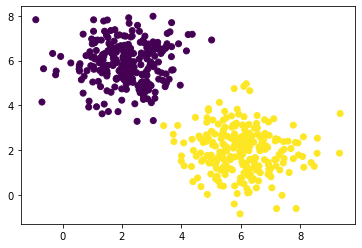

In [3]:
n_samples = 500;
blob_centers = ([2,6] , [6,2]);
X, y = make_blobs(n_samples, centers = blob_centers);
plt.scatter(X[:,0], X[:,1], c=y);

### sklearn MLP Classifier

In [4]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X, y) #sklearn
print(clf.predict_proba(X[:1]))
print(clf.predict([X[0]]))
clf.score(X, y)

[[9.99888876e-01 1.11124263e-04]]
[0]


1.0

In [5]:
#shit function to draw the resulting predictions. Just colors the entire plane. Imagine not having a js Marching Squares code
tx = np.linspace(0, 10, 100)
ty = np.linspace(0, 10, 100)

xs = [];
ys = [];
c = [];
for i in tx:
    for j in ty:
        xs.append(i)
        ys.append(j)
        c.append(clf.predict_proba([[i,j]])[0][0])

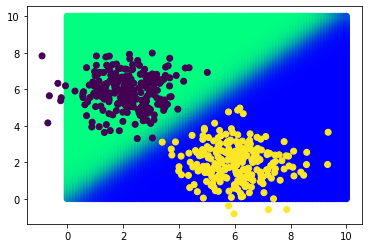

In [6]:
plt.scatter(xs, ys, c = c, cmap = 'winter')
plt.scatter(X[:,0], X[:,1], c = y)

### Solution to things with my code

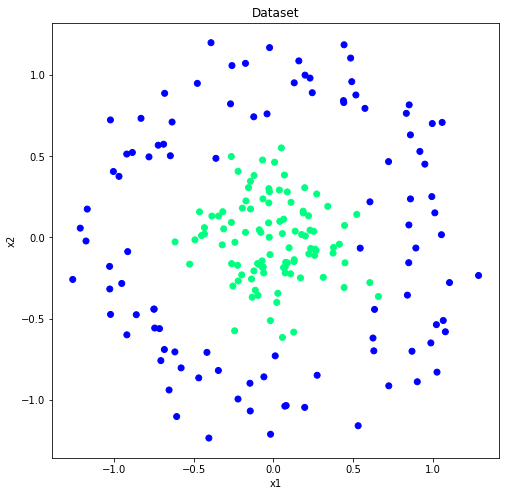

In [55]:
X, y = make_circles(200, factor = 0.3, noise = 0.15)
#X, y = make_moons(200,noise = 0.01)
#clf = MLPClassifier(random_state=1, max_iter=10000).fit(X, y) #sklearn

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=y, cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Dataset')
plt.show()

In [80]:
network = Neural_Network([2,100,50,50,2], alpha = 0.07, niter = 10)

In [81]:
target = [] #convert target to onehot
for i in range(len(y)):
    temp = np.zeros(2)
    temp+=0.01;
    temp[int(y[i])] = 0.99;
    target.append(temp)

In [82]:
network.solve(X, target)
network.evaluate(X, target, evalClass = 0)

'Accuracy: 0.965 | Precision 0: 0.97 | Recall 0: 0.9603960396039604'

In [86]:
bound = 2;
tx = np.linspace(-bound, bound, 100)
ty = np.linspace(-bound, bound, 100)

xs = [];
ys = [];
c = [];
for i in tx:
    for j in ty:
        xs.append(i)
        ys.append(j)
        c.append((network.predict([i, j])[0]));
        #c.append(clf.predict([[i,j]])[0])

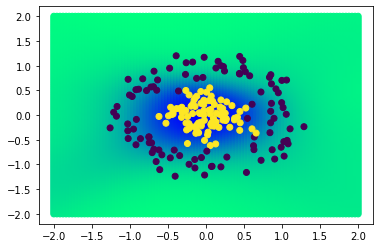

In [87]:
plt.scatter(xs, ys, c = c, cmap = 'winter')
plt.scatter(X[:,0], X[:,1], c = y)

In [85]:
network.saveThetas();
network.saveData(X, target)

In [12]:
#clf.coefs_ is how you get coefficients from the library

### SVM (SVC) Stuff

In [104]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [105]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

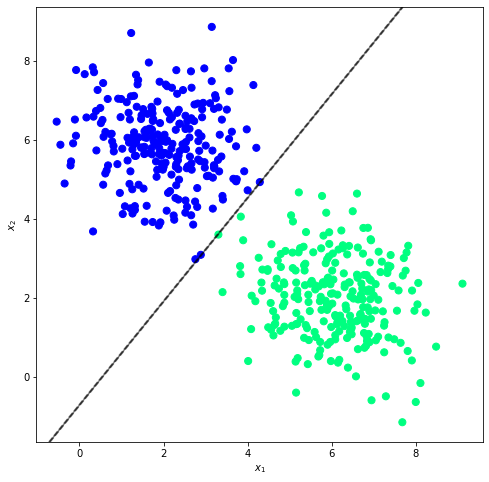

In [108]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plot_svc_decision_function(model);